In [3]:
#This was a test to see how we could generate eccetnric orbit plots effectively
#This code is used in the final SamplingRVs.py and RV_K_investigation files

In [5]:
    import matplotlib.pyplot as plt
    #matplotlib.use('Qt5Agg') #comment this line out if using colab
    import numpy as np
    import os
    from scipy.optimize import curve_fit
    #from matplotlib.backends.backend_pdf import PdfPages
    
    
    
        # Check if running inside Jupyter Notebook
    '''try:
        get_ipython()  # If this fails, we're not in a Jupyter Notebook
        print("Running inside Jupyter Notebook")
    except NameError:
        print("Running outside Jupyter, using default backend")
        matplotlib.use('Qt5Agg')  # Only set this if NOT in Jupyter'''

    import astropy
    import random
    #x = [0,1,2,3,4,5,6,7,8,9]
    #y = x
    #plt.plot(x, y)    #Testing out matplotlib inline to make sure this runs
    #print()
    #plt.show()
    from scipy.optimize import fsolve
    #Adding star values from RSCVn range
    #print("NumPy reference:", np)
    
    file = 'table1.dat'
    import os
    import glob
    folder_path = 'C:/Users/Jonah/Astro/Stars/DATA/' + file  # Change this to the path of your folder

In [2]:
 def genorbit_e(Period):   
            
            P = Period
            Porb = Period * 86400
            
            print(f"P: {Period} days")
                
            if np.log10(P) < 1:
                e = 0
            elif np.log10(P) >= 1 and np.log10(P) < 2:
                e = random.uniform(0, 0.4)
            elif np.log10(P) >= 2:
                e = random.uniform(0.2, 0.6)
            #eccens.append(e)
            #eccens_logPvals.append(np.log10(Period))
            
                
            Ke = (  (M2**3 * np.sin(incl)**3 * (2 * np.pi * G)) / (Porb * (M1 + M2)**2  * (1-e**2)**3/2)  )**(1/3)
            print("Ke:", Ke/1000)
            
            # Orbital Parameters
            omega = np.deg2rad(np.random.uniform(0, 360))  # Argument of periapsis in radians
        
            t = x
            n = 2 * np.pi / P  # Mean motion (rad/day)
            
            # Mean anomaly M(t)
            M = n * t
            
            # Solve Kepler's equation using Newton-Raphson method
            #This improves speed of calculation, as opposed to scipy fsolve
            E = M.copy()
            def newton_solve_kepler(E, M, e, tol=1e-6, max_iter=100):
                for _ in range(max_iter):
                    f_E = E - e * np.sin(E) - M
                    f_prime_E = 1 - e * np.cos(E)
                    delta_E = -f_E / f_prime_E
                    E += delta_E
                    if np.all(np.abs(delta_E) < tol):
                        break
                return E
            
            E = newton_solve_kepler(E, M, e)
            
            # Compute True Anomaly nu(t)
            nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2), np.sqrt(1 - e) * np.cos(E / 2))
            
            # Compute Radial Velocity v_r(t)
            v_r = Ke * (np.cos(omega + nu) + e * np.cos(omega))
            
            # Plot results
            return v_r/1000, Ke/1000, P, e

In [3]:

        

        #print("Number of Samples:", samples)
        
        ###########################
        ###########################
        
        #Sample from random orbit
        def sample(orbit, samples):
            xval = []
            yval = []
            obsday = 0
            prevsamp = int((np.random.random()*len(x)) - 1)
            for k in range(samples):
                obsday = obsday + 1
                #print(obsday)
                if obsday < int(np.random.random()*2)+2:
                    #print("<rand")
                    #print(prevsamp)
                    samp = prevsamp + int(np.random.random()*75)
                    if samp > len(x)-1:
                        samp = len(x)-1
                        #print("Limit Hit")
                    prevsamp = samp
                    #print("Km/s:", orbit[samp])
                    #print("Day:", x[samp])
                    yval.append(orbit[samp])
                    xval.append(x[samp])
                    #print(samp)
                    
                else:
                    #print("else")
                    samp = int((np.random.random()*len(x)))
                    #print(prevsamp)
                    if samp > len(x)-1:
                        samp = len(x)-1
                        #print("Limit Hit")
                    prevsamp = int((np.random.random()*len(x)) - 1)
                    prevsamp = samp
                    #print("Km/s:", orbit[samp])
                    #print("Day:", x[samp])
                    
                    yval.append(orbit[samp])
                    xval.append(x[samp])
                    obsday = 0
                    #print(samp)
                    #print(obsday)
                #print()
            return xval, yval


In [170]:
def plotorbs(xval, yval, orbit):
            ymean = np.mean(orbit)   
            ymean_val = np.mean(yval)
            
                    #print()
            fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 
            # First plot
            axs[0].plot(x, orbit, linewidth = 1, color = 'black')
            #axs[0].axhline(ymean, color = "blue", linewidth = 1, linestyle = "-.", alpha = 0.5)
            axs[0].axhline(0, color="black", linewidth = 1, linestyle = "-.", alpha = 0.5)
            axs[0].set_title("Simulated Orbit")
            axs[0].set_xlabel("Period (days)")
            axs[0].set_ylabel("Radial Velocity (km/s)")
            axs[0].set_xlim(-10,(365)+10)
                
            # Second plot
            axs[1].scatter(xval, yval, marker=".", color = 'black')
            #axs[1].axhline(ymean, color = "blue", linewidth = 1, linestyle = "-.", alpha = 0.5)
            axs[1].axhline(ymean_val, color = "red", linewidth = 1, linestyle = "-.", alpha = 0.5)
            axs[1].plot(x, orbit, alpha = 0.15, color = 'black', linewidth = 1)
            axs[1].axhline(0, color="black", linewidth = 1, linestyle = "-.", alpha = 0.5)
            axs[1].set_title("Simulated Observations")
            axs[1].set_xlabel("Period (days)")
            axs[1].set_ylabel("Radial Velocity (km/s)")
            axs[1].set_xlim(-10,(365)+10)
                
            plt.tight_layout()  # Adjust spacing between plots
            plt.savefig("Sim_orbs_1", dpi = 300)
            plt.show()
            print(ymean, ymean_val)

In [172]:
def measure(yval, a):
            std = np.std(yval)
            #print("Standard Deviation:", std)
            Amp = (np.max(yval) - np.min(yval)) / 2
            
            
            print("Measured Amplitude (K Value):", Amp) 
            print("Actual Amplitude (K Value):", a)
            #print()
            #return Amp, std

P: 25 days
Ke: 72.24691619665442


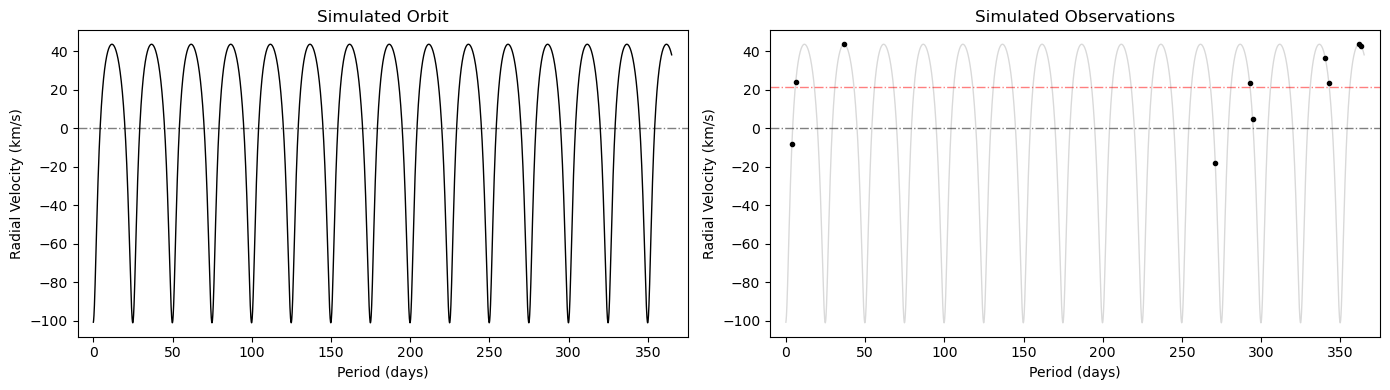

0.4115155663606703 21.4536681271101
Measured Amplitude (K Value): 30.894695652822342
Actual Amplitude (K Value): 72.24691619665442
Eccentricity: 0.39951606231802544


In [210]:
Msol = 1.9891 * 10**30 #kg
G = 6.67430e-11  # m^3 kg^-1 s^-2

x = np.linspace(0, 365, 10000) 
#x = np.linspace(0, 365*2, 365*2) 
m1 = random.uniform(0.9, 2)
m2 = random.uniform(0.1, m1)

M1 = m1 * Msol
M2 = m2 * Msol
v = random.uniform(0,1)
incl = np.arccos(2 * v - 1)
#inclinations.append(incl)


samples = 10

orbit, a, b, e = genorbit_e(25)
xval, yval = sample(orbit, samples)
plotorbs(xval, yval, orbit)
measure(yval, a)
print(f"Eccentricity: {e}")